---
<big><big><big><big><big><big>Metody uczenia maszynowego</big></big></big></big></big></big>

---

---
<big><big><big><big><big>Wybór najlepszego modelu</big></big></big></big></big>

---

---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure, output_notebook
from bkcharts import Scatter

from itertools import combinations

In [3]:
output_notebook()
sns.set(font_scale=2.0)

Loading BokehJS ...

Image inclusion
<img src="../mum_figures/" width="100%">

In [4]:
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, matthews_corrcoef, confusion_matrix
from sklearn import preprocessing

In [5]:
from sklearn.datasets import load_boston, load_diabetes, load_linnerud, make_regression, make_s_curve
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3, make_sparse_uncorrelated
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, mean_squared_error

In [6]:
from astroML.datasets import fetch_imaging_sample
from sklearn.preprocessing import PolynomialFeatures
from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z

# Błąd testujący i bład uczenia

1. __Generalizacja__ określa jak jakość predykcji na danych __nie używanych__ w trakcie uczenia
  * jak określać jakość modeli?
  * jak porównywać modele?
  * jak wybrać najlepszy model dla problemu?
    * typ modelu i jego parametrów
  * jak oceniać końcowy błąd?
  * oceniać złożoność modelu?
    
2. __funkcja kosztu__ (__loss function__) jest miarą błędu jaki model popełnia
  * np. funkcja kwadratowa $$L(Y, \hat{f}(X)) = (Y-\hat{f}(X))^2$$
  * funkcja $\widehat{f}$ nauczona na danych __trenujących__
    * funkcja kwadratowa w zadaniu regresji, ale możliwy inny wybór
  * dla klasyfikacji wiele opcji

3. błąd __testujący__ (albo __generalizacji__) to błąd predykcji modelu (nauczonego na zbiorze $\mathcal{T}$) na __ustalonej niezależnej__ próbce danych 
$$Err_\mathcal{T}=E[L(Y, \widehat{f}(X))\mid\mathcal{T}]$$

4. __oczekiwany błąd predykcji__ to $$Err=E[L(Y, \hat{f}(X))]=E[Err_\mathcal{T}]$$
  * wartość oczekiwana po __wszelkich__ zbiorach uczących (a wobec tego po wszelkich $\hat{f}$) i zbiorach testujących
  * potrzebna odpowiednia procedura dla estymocji $Err$ i wyboru minimalizującego go modelu

5. błąd __uczenia__ to średni koszt dla zbioru uczącego $$err=\frac{1}{N}\sum_i L(Y, \widehat{f}(X))$$
  * błąd trenujący __nie jest__ dobrym przybliżeniem błędu predykcji!
  
6. podobnie dla innych rodzajów błędów
  
7. typowym problemem jest __brak danych__
  * jesli danych jest bardzo dużo, to można rozdzielić dane na 
    1. __uczące__: dla nauczania
    2. __walidujące__: dla wyboru optymalnych parametrów
    3. __testujące__: dla sprawdzania błędu generalizacji
  * inaczej gdy danych jest mało

## Podział błędu na odchylenie i wariancję (bias-variance decomposition)

1. dane z procesu pomiaru i są obarczone __nieusuwalnym błędem__ $\epsilon$ $$y_i=f(x_i)+\epsilon$$
  * prawdziwa (true) funkcja $f$ jest nieznana
  * o błędzie można założyć, że $E[\epsilon]=0$ oraz $E[\epsilon^2]=\sigma^2$
  
2. niech $L(\theta)$ __kwadratowa__
$$\begin{align}
Err(x)&=E[L(Y, \widehat{f}(X))|X=x]=E[(y-\widehat{f}(x))^2]\\
%&=E[(f(x)+\epsilon-\hat{f}(x))^2]=E[(f(x)-\hat{f}(x)+\epsilon)^2]\\
%&=E[(f(x)-\hat{f}(x))^2]+E[2\epsilon(f(x)-\hat{f}(x))]+E[\epsilon^2]&\text{błąd $\epsilon$ jest nieskorelowany z błędem predykcji}\\
%&=E[(f(x)-\hat{f}(x))^2]+E[\epsilon^2]\\
%\\
%&=E\left[\left(f(x)-E[\hat{f}(x)]+E[\hat{f}(x)]-\hat{f}(x)\right)^2\right]+E\left[\epsilon^2\right]\\
%\\
%&=E\left[\left(f(x)-E[\hat{f}(x)]\right)^2\right]\\
%&+E\left[\left(f(x)-E[\hat{f}(x)]\right)\left(E[\hat{f}(x)]-\hat{f}(x)\right)\right]&\text{błedy są znowu nieskorelowane}\\
%&+E\left[\left(E[\hat{f}(x)]-\hat{f}(x)\right)^2\right]+E\left[\epsilon^2\right]\\
%\\
&=\underbrace{E\left[\left(f(x)-E[\widehat{f}(x)]\right)^2\right]}_{\text{bias}^2}
+\underbrace{E\left[\left(E[\widehat{f}(x)]-\widehat{f}(x)\right)^2\right]}_{\text{wariancja modelu}}
+\underbrace{E\left[\epsilon^2\right]}_{\text{szum danych}}
\end{align}$$

  * __bias$^2$__: suma kwadratów różnic między wartością prawdziwej funkcji $f()$ a wartością __oczekiwaną__ estymacji,
  * __wariancja__: (czasem __błąd estymacji__) używając 
    * różnych zbiorów uczących, różnych parametrów modelu, 
    * różnych punktów startu (w algorytmach iteracyjnych)
  możemy dostać różne dofitowania modelu, a modele będą miały pewną wariancję wokół wartości średniej
  * __szum danych__: jest niezależny od procesu uczenia; zwykle jest to biały szum

3. rozkład błędu pozwala na wyciągnięcie wniosków o uczeniu
  * oczekujemy, że model będzie __maksymalnie prosty__
    * wtedy jednak możliwy wysoki bias, gdy model jest __prostszy__ od rzeczywistych danych (estymacja wielomiany prostą)
    * bias można zredukować przez zwiększenie przestrzeni dostępnych funkcji
    * modele w których bias przeważa często "__underfitują__"
      * zwykle na początku uczenia model jest zwykle bardzo prosty, ma duży błąd a bias przeważa nad wariancję
      * proste modele: wysoki bias i niska wariancja
  * jednocześnie chcemy, by model dobrze się __dostosowywał__
    * wtedy może mieć wysoką wariancję
      * podczas procesu uczenia  model coraz lepiej dostosowuje się, bias i błąd spadają
      * błąd dla zbioru trenującego stale maleje
      * jednak wariancja (dla różnych modeli) __zaczyna wzrastać__ i nie ma pewności czy model bedzie dobrze generalizował
      * modele z przewagą wariancji często __overfitowują__
      * modele z ograniczoną przestrzenią funkcji (np. ridge, lasso) dają niską wariancję
      * złożony model: niski bias i wysoka wariancja

4. rozwiązania?
  * uczenie __przerwać nim__ osiągnie minimalny błąd
    * metoda wczesnego zatrzymywania (early stopping)
    * kontrola za pomocą zbioru walidacyjnego
    * metoda walidacji krzyżowej

5. analogiczne rozumowanie dla innych funkcji kosztu nie jest oczywiste
  * Domingos zaproponował ostatnio rozwinięcie do zero-jedynkowej funkcji kosztu

In [16]:
def bootstrap_linear_approximations(models=10, n_samples=100, noise=0.5):
    X = np.random.uniform(-5, +5, [n_samples, 1])
    t0 = 0.25; t1 = 0.02; t2 = 0.04; t3 = 0.04
    y_true =  (0.25 + t1 * X + t2 * X**2 + t3 * X**3).reshape((n_samples,))
    if noise > 0.:
        y = y_true + np.random.normal(scale=noise, size=len(y_true))
    else:
        y = y_true
    y_noise = np.sum((y - y_true) ** 2) / n_samples
    
    fig, ax = plt.subplots(figsize=(12, 10))
    xmin, xmax = min(X), max(X)
    ymin, ymax = min(y), max(y)
    x_range = np.linspace(xmin, xmax, 100)
    ax.plot(X, y, 'r*')
    ax.plot(X, y_true, 'g*')
    ax.grid()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    theta = np.zeros((models, 2))
    predicted_all = np.zeros((models, len(y)))
    print('\tnoise\t  variance\t  bias\t\t  mse\n{}'.format('-' * 70))
    for k in range(models):
        X_train, y_train = resample(X, y)
        clr = LinearRegression()
        clr.fit(X_train, y_train)
        predicted = clr.predict(X)
        predicted_all[k, :] = predicted
        theta_fit = [np.mean(predicted), clr.coef_]
        ax.plot(x_range, x_range * theta_fit[1] + theta_fit[0], lw=1)
        theta[k, :] = theta_fit
        y_fit_mean = np.mean(predicted)
        var = np.sum((y - y_fit_mean) ** 2) / n_samples
        bias_squared = np.sum((y_true - y_fit_mean) ** 2) / n_samples
        mse = y_noise + var + bias_squared
        err = np.sum((y - predicted) ** 2) / n_samples
        
    theta_mean = np.mean(theta, 0)
    ax.plot(x_range, x_range * theta_mean[1] + theta_mean[0], 'k-', lw=5)
    # teraz liczymy oczekiwana wartosc obliczonej funkcji
    y_ens_fit = np.mean(predicted_all, 0)
    y_ens_fit_mean = np.mean(y_ens_fit)
    var = 0
    for m in range(models):
        var = np.sum((y_ens_fit - predicted_all[m, ]) ** 2)
    var /=  models * n_samples ** 2
    # var = np.sum((y_ens_fit - y_ens_fit_mean) ** 2) / (n_samples ** 2)
    bias_squared = np.sum((y_true - y_ens_fit) ** 2) / n_samples
    mse = y_noise + var + bias_squared
    err = np.sum((y_true - y_ens_fit) ** 2) / n_samples
    print('{}: \t{:.5f}\t+ {:.5f}\t+ {:.5f}\t= {:.5f}'.format('ens', y_noise, var, 
                                                              bias_squared, mse))
    
    compute_ensembles = True
    if compute_ensembles:
        max_models = 100
        for k in range(1, models):
            comb = np.array([c for c in combinations(range(models), k)])
            # select max_models indices
            ind = list(np.random.choice(len(comb), min(max_models, len(comb))))
            var_ens = 0
            bias_squared_ens = 0
            mse_ens = 0
            for q in ind:
                p = comb[q]
                y_ens_fit = np.mean(predicted_all[p, ], 0)
                y_ens_fit_mean = np.mean(y_ens_fit)
                var = 0
                for m in p:
                    var = np.sum((y_ens_fit - predicted_all[m, ]) ** 2)
                var /=  len(p) * n_samples ** 2
                var_ens += var / len(p)
                bias_squared = np.sum((y_true - y_ens_fit) ** 2) / n_samples
                bias_squared_ens += bias_squared / len(p)
            comb = None
            var_ens /= len(ind)
            bias_squared_ens /= len(ind)
            mse = y_noise + var_ens + bias_squared_ens
            print('{}:{}: \t{:.5f}\t+ {:.5f}\t+ {:.5f}\t= {:.5f}'.format('e', k, y_noise, var_ens, 
                                                         bias_squared_ens, mse))
    comb = None

	noise	  variance	  bias		  mse
----------------------------------------------------------------------
ens: 	0.14133	+ 0.00000	+ 0.64157	= 0.78290
e:1: 	0.14133	+ 0.00000	+ 0.65849	= 0.79982
e:2: 	0.14133	+ 0.00001	+ 0.32488	= 0.46622
e:3: 	0.14133	+ 0.00001	+ 0.21502	= 0.35635
e:4: 	0.14133	+ 0.00000	+ 0.16115	= 0.30248
e:5: 	0.14133	+ 0.00000	+ 0.12876	= 0.27008
e:6: 	0.14133	+ 0.00000	+ 0.10728	= 0.24860
e:7: 	0.14133	+ 0.00000	+ 0.09182	= 0.23315
e:8: 	0.14133	+ 0.00000	+ 0.08035	= 0.22168
e:9: 	0.14133	+ 0.00000	+ 0.07140	= 0.21272
e:10: 	0.14133	+ 0.00000	+ 0.06424	= 0.20556
e:11: 	0.14133	+ 0.00000	+ 0.05840	= 0.19972
e:12: 	0.14133	+ 0.00000	+ 0.05351	= 0.19484
e:13: 	0.14133	+ 0.00000	+ 0.04939	= 0.19072
e:14: 	0.14133	+ 0.00000	+ 0.04587	= 0.18719
e:15: 	0.14133	+ 0.00000	+ 0.04279	= 0.18412
e:16: 	0.14133	+ 0.00000	+ 0.04011	= 0.18144
e:17: 	0.14133	+ 0.00000	+ 0.03775	= 0.17908
e:18: 	0.14133	+ 0.00000	+ 0.03565	= 0.17698
e:19: 	0.14133	+ 0.00000	+ 0.03378	= 0.17510
e:20: 	

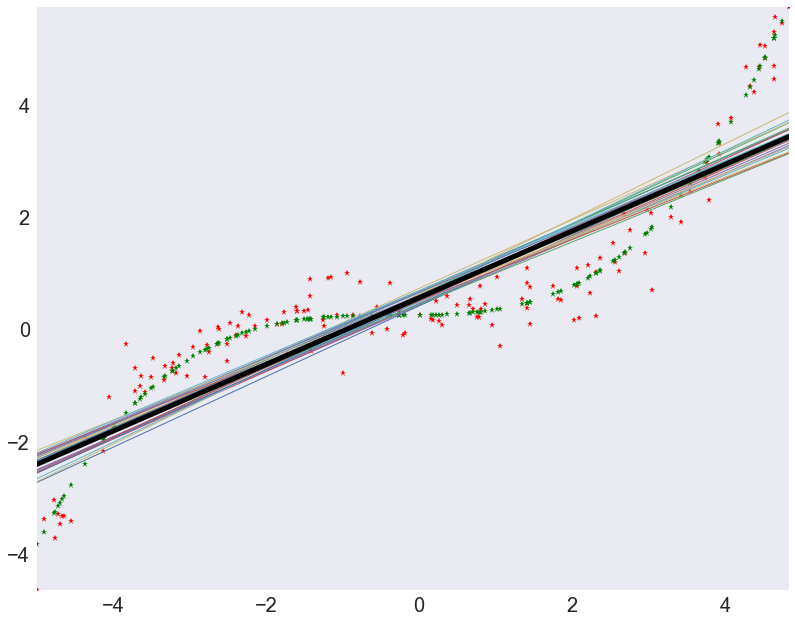

In [17]:
bootstrap_linear_approximations(models=25, n_samples=150, noise=0.35)

## Bias-wariancja dla modelu k-najbliższych sąsiadów

1. model liniowy
$$\begin{align}
Err(x)&=\underbrace{E\left[\left(f(x)-E[\hat{f}(x)]\right)^2\right]}_{\text{bias}^2}
+\underbrace{E\left[\left(E[\hat{f}(x)]-\hat{f}(x)\right)^2\right]}_{\text{wariancja modelu}}
+\underbrace{E\left[\epsilon^2\right]}_{\text{szum danych}}
\end{align}$$

2. model k-najbliższych sąsiadów
$$ 
Err(x_0)=\underbrace{\left[f(x_0)-\frac{1}{k}\sum_{p=1}^k{f}(x_{(p)})\right]^2}_{\text{bias}^2}
+\underbrace{\frac{\sigma_{\epsilon}^2}{k}}_{\text{wariancja modelu}}
+\underbrace{\sigma^2}_{\text{szum danych}}
$$
  * przykłady uczące $x$ są ustalone
  * złożoność modelu __w odwrotnej relacji__ do liczby sąsiadów _k_
  * wraz ze __wzrostem _k___ 
    * kwadrat różnicy między prawdziwą $f(x_0)$ a średnią z _k_-najbliższych sąsiadów $(f(x_0)-\frac{1}{k}\sum_{x'\in{}N_k}f(x'))^2$ __rośnie__ (czyli rośnie bias) 
    * wariancja maleje

<img src="../mum_figures/bias_variance_decomposition.png" width="80%"/> [rysunek: Hastie et al.]

<img src="../mum_figures/bias_variance_tradeoff.png" width="80%" /> [rysunek: Hastie et al.]

1. bias (zielony), wariancja niebieski), całkowity błąd (pomarańczowy)
2. w regresji (górny wiersz) bias i wariancja __dodają się__ dając całkowity błąd
3. w klasyfikacji
  * bias i wariancja są takie same jak w regresji
  * błąd predykcji __nie jest__ już sumą wariancji i biasu
    * niech prawdopodobieństwo danej klasy wynosi $0.85$ a wartość estymacji $0.55$
    * wartość biasu $(0.85-0.55)^2$ ma jednak w dalszym ciągu dużą wartość
    * predykcja jednak wciąż prawidłowa a błąd predykcji zerowy!
4. rozwiązania dla problemów regresji i predykcji są dramatycznie różne!

# Wybór (selection) i ocena (assessment) modelu
* problem braku danych
* podział danych
* ocena modelu niemożliwa na danych uczących

## Walidacja krzyżowa

1. danych zwykle brakuje, 
  * jeśli jest dużo, to podzielić na zbiory __uczący__, __walidujący__ i __testujący__
2. jak wykorzystać wszystkie dane do uczenia pozostawiając sobie dane do testowania???

3. __walidacja krzyżowa__
  1. podzielić dane na __K__ części
    * zwykle K = 3, 5, 10
    * podział __losowy__
    * dla klasyfikacji często __stratyfikacja__
      * zapewnienie równego prior klas w każdym fragmencie
  2. powtórzyć K-krotnie 
    * nauczyć model na $K-1$ częściach
    * ocenić rozwiązanie na pozostałej części
  3. końcowy błąd walidacji krzyżowej
  $$\boxed{CV(\widehat{f})=\frac{1}{N}\sum_{i=1}^NL(y_i, \widehat{f}^{-k(i)}(x_i))\;}$$
  gdzie $\widehat{f}^{-k(i)}(x_i)$ jest wartością dla tego modelu, w którym przykład $x_i$ __nie był__ przykładem uczącym

4. dla $K=N$ to metoda __leave_one_out__
    * ta estymacja ma dużą wariancję ze względu na podobieństwo przykładów       
    * kosztowne obliczeniowo
  * dla niskiego K wariancja będzie niska
    * wysoki bias modeli gdy $K$ zbyt małe
    * niskie K powoduje zwykle przecenianie błędu generalizacji
    * wysokie K daje wysoką wariancję
    
5. K=10 wydaje się dobrym rozwiązaniem

### Problemy z walidacją krzyżową
1. problem: zbudować najlepszy model dla zrównoważonego problemu klasyfikacji
  
2. podejście pierwsze (za Hastie et al.)
  1. dla całego zbioru wybrać podzbiór zmiennych niezależnych o najwyższej korelacji z wyjściowymi etykietami
  2. używając tych zmiennych zbudować klasyfikator
  3, korzystając z walidacji krzyżowej określić parametry i ocenić model
3. podejście drugie
  1. podział danych na K foldów
  2. dla każdych K-1 foldów wybieramy zmienne niezależne o najwyższej korelacji ze zmienną zależną dla tych K-1 foldów
  3. budujemy klasyfikator z tych zmiennych dla przykładów z tych K-1 foldów
  4. oceniamy predykcję na pozostałym K-tym foldzie
   
4. które podejście jest prawidłowe?
5. co może być niepoprawne w drugim podejściu?

* K-ty fold musi być odłożony __przed__ jakimikolwiek operacjami w sposób __niezwiązany__ z etykietami
* ten błąd jest popełniany bardzo często w artykułach naukowych
  * autorzy często, czasem nieświadomie, dokonuje wstępnej selekcji cech i przykładów co wpływa na wyniki!

## Bootstrap
1. __bootstrap__ (Efron) to uogólnienie walidacji krzyżowej
  1. B-krotnie wylosować __z powtórzeniami__ próbkę uczącą $Z^b=\{(x_i,y_i)\},\hskip1em b=1,\dots,B$
    * zwykle B=100
  2. model uczony ponownie dla zbioru Z
  3. wyliczyć estymację oczekiwanego błędu generalizacji
  $$\widehat{Err}=\frac{1}{B}\frac{1}{N}\sum_{b=1}^B\sum_{i=1}^NL(y_i, \widehat{f}^{*b}(x_i)),$$ gdzie $\widehat{f}^{*b}(x_i)$ jest wartością modelu dla b-tego zbioru bootstrap dla $x_i$
  

2. to procedura __zbyt optymistyczna__
  * zbiory uczący i testujące przecinają się i predykcje __nadmiernie dopasowują się__ (overfitting)
  * jakie jest prawdopodobieństwo, że $i$-ta obserwacja będzie w $b$-tym zbiorze bootstrap? 
  $$\begin{align}P(i; b)&=1-P(-i;b)=1-\left(1-\frac{1}{N}\right)^N\\
  &\approx 1-e^{-1}\approx0.632\end{align}$$
  * stąd wartość oczekiwana (dla binarnego problemu) $E[\widehat{Err}]=0.5\times(1-0.632)=0.184$
    * to znacznie bardziej optymistyczna wartość niż oczekiwane $0.5$!
3. bootstrap powinien działać __podobnie__ do walidacji krzyżowej
  * dla każdego przykładu lista indeksów $C^{-i}$ zbiorów $Z^b$ w których przykład i-ty __nie__ występował
    $$\boxed{
    \widehat{Err}^{(1)}=\frac{1}{N}\sum_{i=1}^N\frac{1}{|C^{-i}|}\sum_{b\in C^{-i}}L\left(y_i, \widehat{f}^{*b}(x_i)\right)
    \;}$$
    * B powinno być na tyle duże, by każdy przykład chociaż raz __nie__ występował w zbiorze uczącym

4. liczba __różnych__ przykładów w każdym $Z^b$ rzędu $0.632N$
  * zbiór jest ___mały___ w stosunku do całego i może mieć duży bias
  * przypomina walidację krzyżową z __dwoma__ foldami i __pesymistycznym__ błędem
  * stąd poprawka statystyczna
  $$\boxed{
  \widehat{Err}^{(0.632)}=0.368\times\overline{err}+0.632\times \widehat{Err}^{(1)}
  ,\;}$$
    * gdzie $\overline{err}$ błędem na zbiorze trenującym
    * może działać słabo w sytuacjach __nadmiernego__ dopasowania
    * istnieją dodatkowe rozszerzenia bootstrap

5. bootstrap bywa kosztowne obliczeniowo 
  * dużą liczbę modeli do znalezienia
  * kosztowniejsze modele do obliczenia
  * jednak estymacja oczekiwanej predykcji jest lepsza niż ta walidacji krzyżowej
    * lepiej statystycznie uzasadniony
6. zarówno walidacja krzyżowa jak i bootstrap są nadmiernie optymistyczne

# A jak znaleźć najlepszy model?

1. mamy zbiór modeli z danej rodziny
2. dostępny zestaw zbiorów uczących z pewnej rodziny, np. dla zastosowania
3. zmienne są architektura modeli, parametry i ich liczba
4. potrzebujemy określić jak algorytmy z tej rodziny radzą sobie z zadanymi problemami

## Procedura podwójnej (zagnieżdżonej) walidacji krzyżowej
1. podziel zbiór uczący na K foldów
2. for k=1,...,K
  1. podziel K-1 foldów poza k-tym na P foldów
    * zwykle K=P
  2. for p=1,...,P
     1. naucz każdy z ustalonych modeli na P-1 foldach poza p-tym
       * architektury, układy parametrów, funkcje bazowe, pruning, etc. 
     2. oceń każdy model na p-tym foldzie
  3. wybierz najlepszy model w wewnętrznej petli(z najlepszą statystyką CV) 
    * lub kilka najlepszych modeli
  4. oceń wybrany model n k-tym foldzie
3. wylicz końcowe statystyki walidacji krzyżowej

4. podwójna walidacja krzyżowa __pozwala dobierać__ hiperparametry rozwiązania
  * __wewnętrzna__ pętla odpowiada __walidacji__ i wyszukiwaniu najlepszych hiperparametrów
  * __zewnętrzna__ pozwala ocenić __generalizację__
  * w niezagnieżdżonej walidacji krzyżowej te same dane mogą służyć do wyboru hiperparametrów jak i oceny generalizacji
    * to powoduje ___wyciekanie___ danych
  * różnica między wartościami wewnętrznej/zewnętrznej pętli może wskazywwać na ewentualny overfitting
5. procedura kosztowna i czasochłonna

## Wielokrotna zagnieżdżona walidacja krzyżowa
<img src="../mum_figures/repeated_cross_validation.png" width="100%">
1. procedura powtórzona wielokrotnie, zwykle 100 ok. razy
2. każde powtórzenie z __innym początkowym podziałem__
  * podział wpływa na wybór hiperparametrów
3. lepsza estymacja zmienności

# Ocena jakości modelu

1. po uczeniu określić __jakość__ na ile dobrze model minimalizuje błędy
  * w uczeniu minimalizowana jest __funkcja celu__ 
  * później jednak potrzebna jest inna miara __poprawności__ modelu
    * dobroci, skuteczności, ...
  * ocenia jak dobrze przybliżane są przykłady ze zbioru danych, 
    * to __zwykle nie jest__ bezpośrednia wartość funkcji celu
2. __minimalizacja danej funkcji celu _niekoniecznie_ minimalizuje także inną funkcję jakości__
      

## Funkcje oceniające (score functions) dla problemów regresji
1. __średni błąd kwadratowy__ $$MSE(y, \widehat{y})=\frac{1}{N}\sum_{i=1}^N(y_i-\widehat{y}_i)^2$$
  * MSE przyjmuje dowolne dodatnie wartości
  * jest bezpośrednio minimalizowana przez model używający kwadratowej funkcji kosztu
  * tzw. __outliers__ mają duży wpływ na jej wartość
  
2. __średni błąd bezwzględny__ $$MAE(y, \widehat{y})=\frac{1}{N}\sum_{i=1}^N|y_i-\widehat{y}_i|$$
  * bezpośrednio minimalizowany przez sieci z funkcją kosztu $L_1$
    * rzadziej wykorzystywane ze względu na nieciągłość pochodnej $L_1$
      * zwykle obsługiwane programistycznie
  * redukuje wpływ outliers  
  

3. __bezwzględny błąd mediany__ $$MedAE(y,\widehat{y})=median(\{|y_i-\widehat{y}_i|\}_{i=1}^N)$$
  * szczególnie odporny na outliers
    
4. __miara $R^2$__ $$R^2(y,\widehat{y})=1-\frac{\sum_i(y_i-\widehat{y}_i)^2}{\sum_i(y_i-\overline{y})^2},$$
gdzie $\overline{y}_i$ jest __średnią__ prawdziwych wyjściowych wartości
  * $R^2$ odpowiada __współczynnikowi uwarunkowania__
  * ocenia na ile dobrze przyszłe przykłady będą przybliżane
  * model przybliżający idalnie ma wartość $R^2=1$
  * model zwracający zawsze wartość oczekiwaną ma $R^2=0$
    * ten model __nie zwraca__ uwagi na atrybuty wejściowe
  * modele jeszcze słabsze mogą mieć wartości $R^2$ ujemne
  * $R^2$ pozwala częściowo porównywać różne modele, także na różnicy danych, co jest trudne dla regresji
  
5. __miara tłumacząca przez wariancję__ $$ev(y,\widehat{y})=1-\frac{var\{y-\widehat{y}\}}{var\{y\}}$$
  * najlepszy model ma wartość $1.0$

## Funkcje oceniające dla problemów klasyfikacji
1. __accuracy__ $$acc(y,\widehat{y})=\frac{1}{N}\sum_i1(\widehat{y}_i=y_i)$$
  * właściwie ułamek przykładów poprawnie zaklasyfikowanych, stąd $acc\in[0,1]$
  * odpowiada zero-jedynkowej funkcji kosztu
  * podobnie __miara Hamminga__ zwraca frakcję źle przewidzianych etykiet
  * __miara Jaccarda__ zwraca frakcję identycznie etykietowanych przez liczność etykiet
  * nie jest różniczkowalna
    * trudniej minimalizowana bezpośrednio
    * możliwa minimalizacja w modelach uczenia przez wzmocnienie
  
2. __macierz pomyłek (_confusion matrix_)__
  * macierz $K\times K$ opisuje błędne przypisania przykładów z prawdziwej klasy $i$ do innej klasy $j$
  * idealna jest przekątniowa
  * elementy macierzy mogą być liczbą bądź frakcją przypisań
  * pozwala na analizę działania algorytmu
    * jeśli liczności klas są niezrównoważone, 
      * to bardziej ogólne miary ukrywają niezrównoważenie 
      * macierz pomyłek pozwala znaleźć specyficzne zachowania
    

3. __entropia krzyżowa__ $$H(y,\widehat{y})=-\sum_iy_i\ln(\widehat{y}_i)+(1-y_i)\ln(1-\widehat{y}_i)$$
  * zwane też __log loss__ (logarytm __naturalny__)
  * dla $N$ przykładów i $K$ klas entropia krzyżowa bedzie miała postać $$H(y,\widehat{y})=-\frac{1}{N}\sum_i^N\sum_k^Ky_{ik}log\widehat{y}_{ik}$$
  * $\hat{y}_i$ jest estymowanym prawdopodobieństwem, że $y_i=1$
  * bezpośrednio minimalizowalna funkcja kosztu
  
4. __hinge loss__ $$L_{hinge}(y,\widehat{y})=\max\{1-y\widehat{y}, 0\}$$

## Pojęcia false positives, false negatives i pochodne
1. w wielu problemach klasyfikacji (szczególnie binarnej) __błędy__ mogą być różnych typów:
  * __FALSE POSITIVE__ polegające na wykryciu danej cechy, gdy w rzeczysitości ta tam jej __nie ma__
  * __FALSE NEGATIVE__ polegające na __nie wykryciu__ cechy, gdy ona jest
  * uzupełniające stany to __TRUE POSITIVE__ i __TRUE NEGATIVE__
  * niektóre błędy są w oczywisty sposób bardziej kosztowne
  * jeśli dana cecha występuje __bardzo rzadko__, to prosty klasyfikator __nigdy__ jej nie wykryje __wciąż osiągająć wysoką dokładność__ (accuracy)!  
2. __accuracy__ $$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$
3. __specificity__ $$specificity=\frac{TN}{TN+FP}$$
  * frakcja negatywnych poprawnie rozpoznanych
  * frakcja poprawnego wykrycia braku cechy tam gdzie jej nie ma
  * $1-specificity = \frac{FP}{FP+TN}$ to __false positive rate FPR__ czyli frakcja niepoprawnego wykrycia cechy wśród przypadków gdzie jej nie ma 

4. __sensitivity (recall)__ (czułość, true positive rate, completness)
$$sensitivity=\frac{TP}{TP+FN}$$
  * frakcja rozpoznanych przykładów, które są zgodne z zapytanienm
  * frakcja poprawnego wykrycia cechy tam gdzie ona jest
  * $1-sensitivity=\frac{FN}{TP+FN}$ to __false negative rate FNR__ czyli frakcja niepoprawnego niewykrycia cechy wśród przypadków, gdzie ona jest
5. __precyzja__ (precision) 
$$\text{precision}=\frac{\text{true positives}} {\text{true positives}+\text{false positives}}$$
  * frakcja przykładów zgodnych z zapytaniem, które zostały rozpoznane

<img src="../mum_figures/precision_recall.png" width="58%"/> [rysunek za Wikipedia]

wykres recall (sensitivity) względem (1 - specitivity)
<img src="../mum_figures/ROC_space.png" width="75%"/>
[By ROC_space.png: Indonderivative work: Kai walz (talk) - ROC_space.png, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=8326140]

<img src="../mum_figures/ROC_errtypes.png" width="100%"/>
[By kakau - Selbstgepinselt mit PowerPoint, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=10657501]

6. pozwala łatwo wprowadzić pojęcie kosztu pomyłki
  * system medyczny przewiduje, czy osoba jest chora na chorobę X
    * __false positive__ błędna predykcja, że osoba __jest__ chora
    * __false negative__ błędna predykcja, że osoba __nie jest__ chora
    * błąd typu __false negative__ niesie za sobą znacznie groźniejsze skutki!

7. __Receiver Operating Characteristic ROC__ to __stosunek TPR (sensitivity, czułość) do FPR = 1 - specificity)__
  * najlepszy możliwy wybór jest w lewym górnym rogu
    * TPR=1.0 czyli poprawne wykrycie cechy zawsze gdy jest
    * FPR=0.0 czyli nigdy nie zaznaczenie cechy jeśli jej nie ma
  * klasyfikotorom wykorzytującym losowy wybór odpowiada przekątna
    * poniżej przekątnej są lasyfikatory __gorsze__ od losowych
  * __krzywe ROC__ dla zadanego klasyfikatora binarnego
    * niech $t$ będzie progiem i $x$ jest zaliczany do klasy $C_1$ jeśli $\hat{y}(x)>t$
    * punkty $(FPR(t), TPR(t)$ wyznaczają krzywe
    * znając wzajemne prawdopodobieństwo klas można znaleźć optymalny próg $t$ jako odpowiadający punktowi najbliższemu rogowi $(0, 1)$ na styku prostej odpowiadającej prawdopodobieństwu względnemu klas i krzywej ROC
    
    

8. __Area Under the Curve AUC__ pole pod powierzchnią krzywej ROC
  * klasyfikator o większym AUC powinien mieć lepsze wyniki
  * AUC odpowiada __prawdopodobieństwu__ że dla dwóch losowych przykładów, __pozytwnego__ i __negatywnego__, algorytm zaklasyfikuje wyżej ten pozytywny (jego uzna za bardziej prawdopodobny _pozytywny_)
  * jednak obliczanie AUC wprowadza szum, więc nie jest calkiem wiarygodne i oparcie się na nim może prowadzić do błędów
  * rozszerzenie do problemów wielo klasowych jest złożone
  
  
  
* wielu autorów używa ROC jako wykresu sensitivity do specificity
  * optymalny klasyfikator mieści się w prawym górnym rogu...

In [6]:
from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

In [7]:
def roc_analysis(n_folds=11):
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X, y = X[y != 2], y[y != 2]
    n_samples, n_features = X.shape

    # Add noisy features
    random_state = np.random.RandomState(0)
    X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    # Classification and ROC analysis
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(y, n_folds=n_folds)
    classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    
    fig, ax = plt.subplots(figsize=(18, 15))
    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=1, label='ROC fold %d (powierzchnia = %0.2f)' % (i, roc_auc))

    ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Losowy')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    ax.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (powierzchnia = %0.2f)' % mean_auc, lw=2)

    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate (1 - specificity)')
    ax.set_ylabel('True Positive Rate (sensitivity)')
    ax.set_title('ROC dla przykladu Iris z walidacja krzyzowa')
    ax.legend(loc="lower right")

TypeError: Argument 'kernel' has incorrect type (expected str, got unicode)

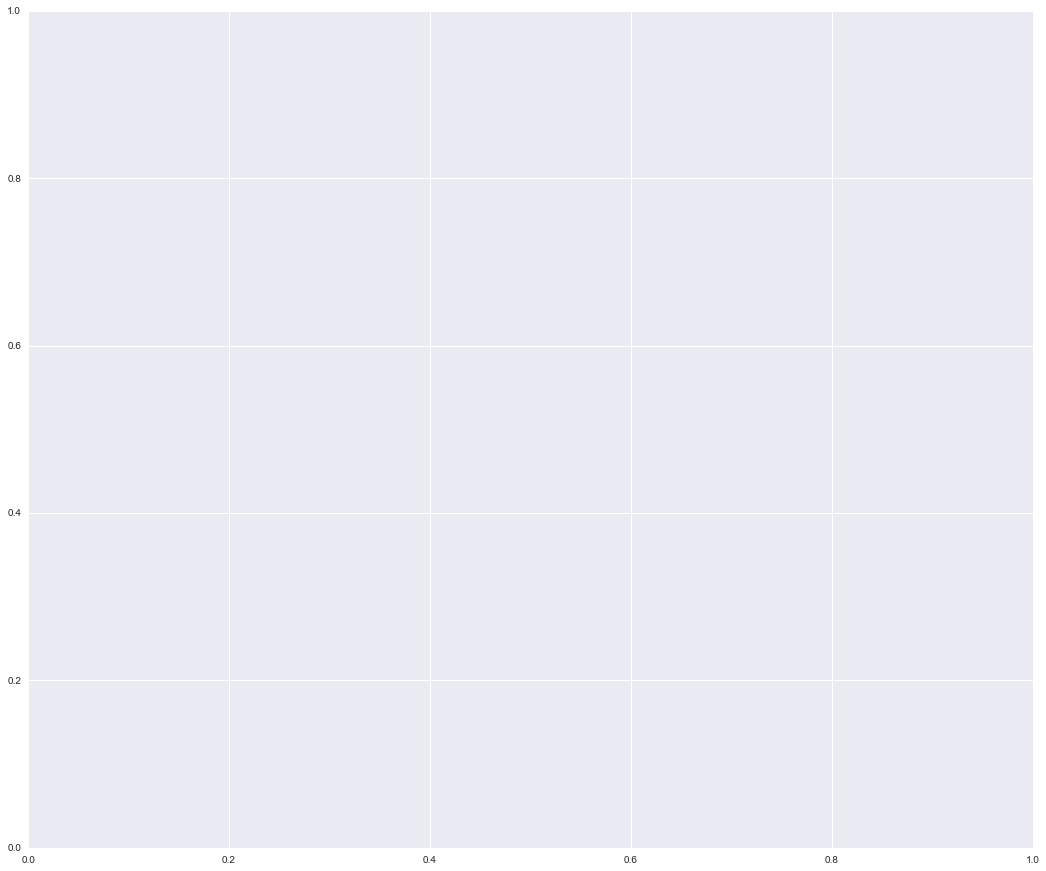

In [8]:
roc_analysis()

## F1 score
1. __recall (sensitivity)__ $$recall=\frac{TP}{TP+FN}$$
  * frakcja wybranych z klasy (TP) i wybranych w stosunku do wszystkich z tej klasy (TP+FN)
  * klasyfikator wybiera $TP+FP$ elementów, ale spośród nich tylko $TP$ poprawnie
  * wybierając __wszystkie__ elementu maksymalizuje _recall_, ale ma niską precyzję
2. __precision__ $$precision=\frac{TP}{TP+FP}$$
  * ułamek poprawnie wybranych (TP) do wszystkich wybranych (TP+FP)
  * wybierając tylko jeden element, chociaż poprawnie, klasyfikator osiąga wysoką precyzję, jednak wciąż niski recall
  
3. __miara F__ łączy $$F=2\frac{precision\cdot recall}{precision+ recall}$$
  * równoważy precision i recall, inaczej __F1__ 
  * średnia harmoniczna recall i precision
  * ogólniej $$F_\beta=(1+\beta^2)\frac{precision\cdot recall}{\beta^2\cdot precision+recall}$$
  
4. dla problemów wieloklasowych
  * miara F może być zastosowana do każdej z klas z osobna
  * jest też kilka metod uśredniania miedzy klasami

## Matthews corellation ceofficient
1. $$MCC=\frac{TP\cdot TN-FP\cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$
  * $MCC\in[-1, 1]$
  * MCC to współczynnik korelacji między prawdziwymi i przewidzianymi klasyfikacjami
  * jest dobrą metodą przedstawienia macierzy pomyłek true/false positives/negatives w postaci jednej liczby
  * często stosowana przez biologów (ale ograniczona do problemów binarnych)

1. teoria rozwinięta podczas pracy nad radarami w trakcie 2 wojny światowej
  * analiza wykrywalności obcych samolotów na ekranach radarów; szczególnie po Pearl Harbour
  * __false negative__ nie wykrycie japońskiego Zero na ekranie radaru
  * __false positive__ fałszywy alarm wykrycia, często wynik szumu